In [99]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sc.settings.verbosity = 0             # verbosity: errors (0), warnings (1), info (2), hints (3)

from scipy.stats import zscore, pearsonr
from statsmodels.stats.multitest import fdrcorrection

In [ ]:
%cd /home/orimosko/projects/phago/downloaded/

/home/orimosko/projects/phago/downloaded


In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')  # low dpi (dots per inch) yields small inline figures

scanpy==1.9.8 anndata==0.9.2 umap==0.5.6 numpy==1.23.5 scipy==1.10.1 pandas==2.0.3 scikit-learn==1.3.2 statsmodels==0.14.1 igraph==0.10.1 pynndescent==0.5.4


/home/orimosko/.local/lib/python3.8/site-packages/pynndescent/utils.py:202: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(
/home/orimosko/.local/lib/python3.8/site-packages/pynndescent/utils.py:302: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(


In [117]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams.update({'font.size': 7})

In [ ]:
adata = sc.read_h5ad("/mc_disk2/data/h5ads/phago/melanoma_UM_filtered.h5ad")

In [ ]:
# Keeps only the primary melanoma samples
adata = adata[adata.obs.Sample.str.len() < 7]

In [15]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

normalizing counts per cell


/home/orimosko/.local/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


    finished (0:00:00)


In [16]:
sc.pp.highly_variable_genes(adata)

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [17]:
sc.pp.pca(adata, use_highly_variable=True)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)


In [18]:
sc.external.pp.bbknn(adata, batch_key='Sample')

computing batch balanced neighbors


	finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:09)


In [19]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:20)


In [20]:
sc.tl.leiden(adata, resolution=0.5)

running Leiden clustering


    finished: found 9 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:25)


/home/orimosko/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/orimosko/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


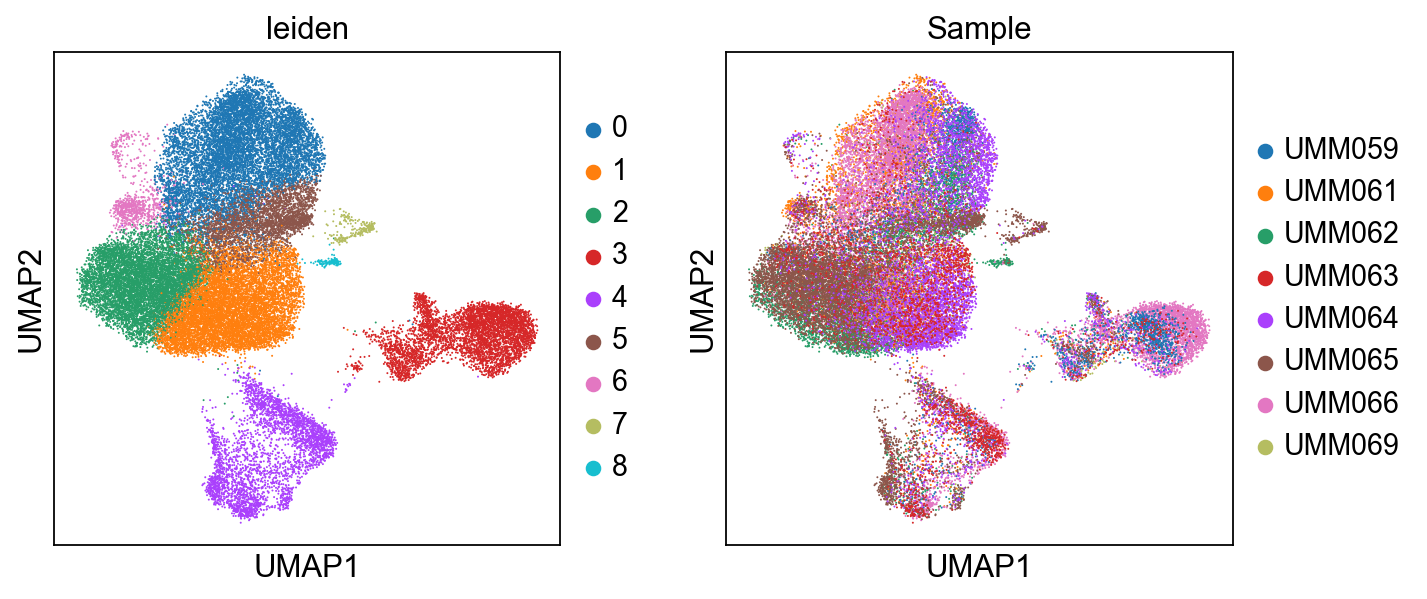

In [21]:
sc.pl.umap(adata, color=['leiden', 'Sample'], ncols=2)

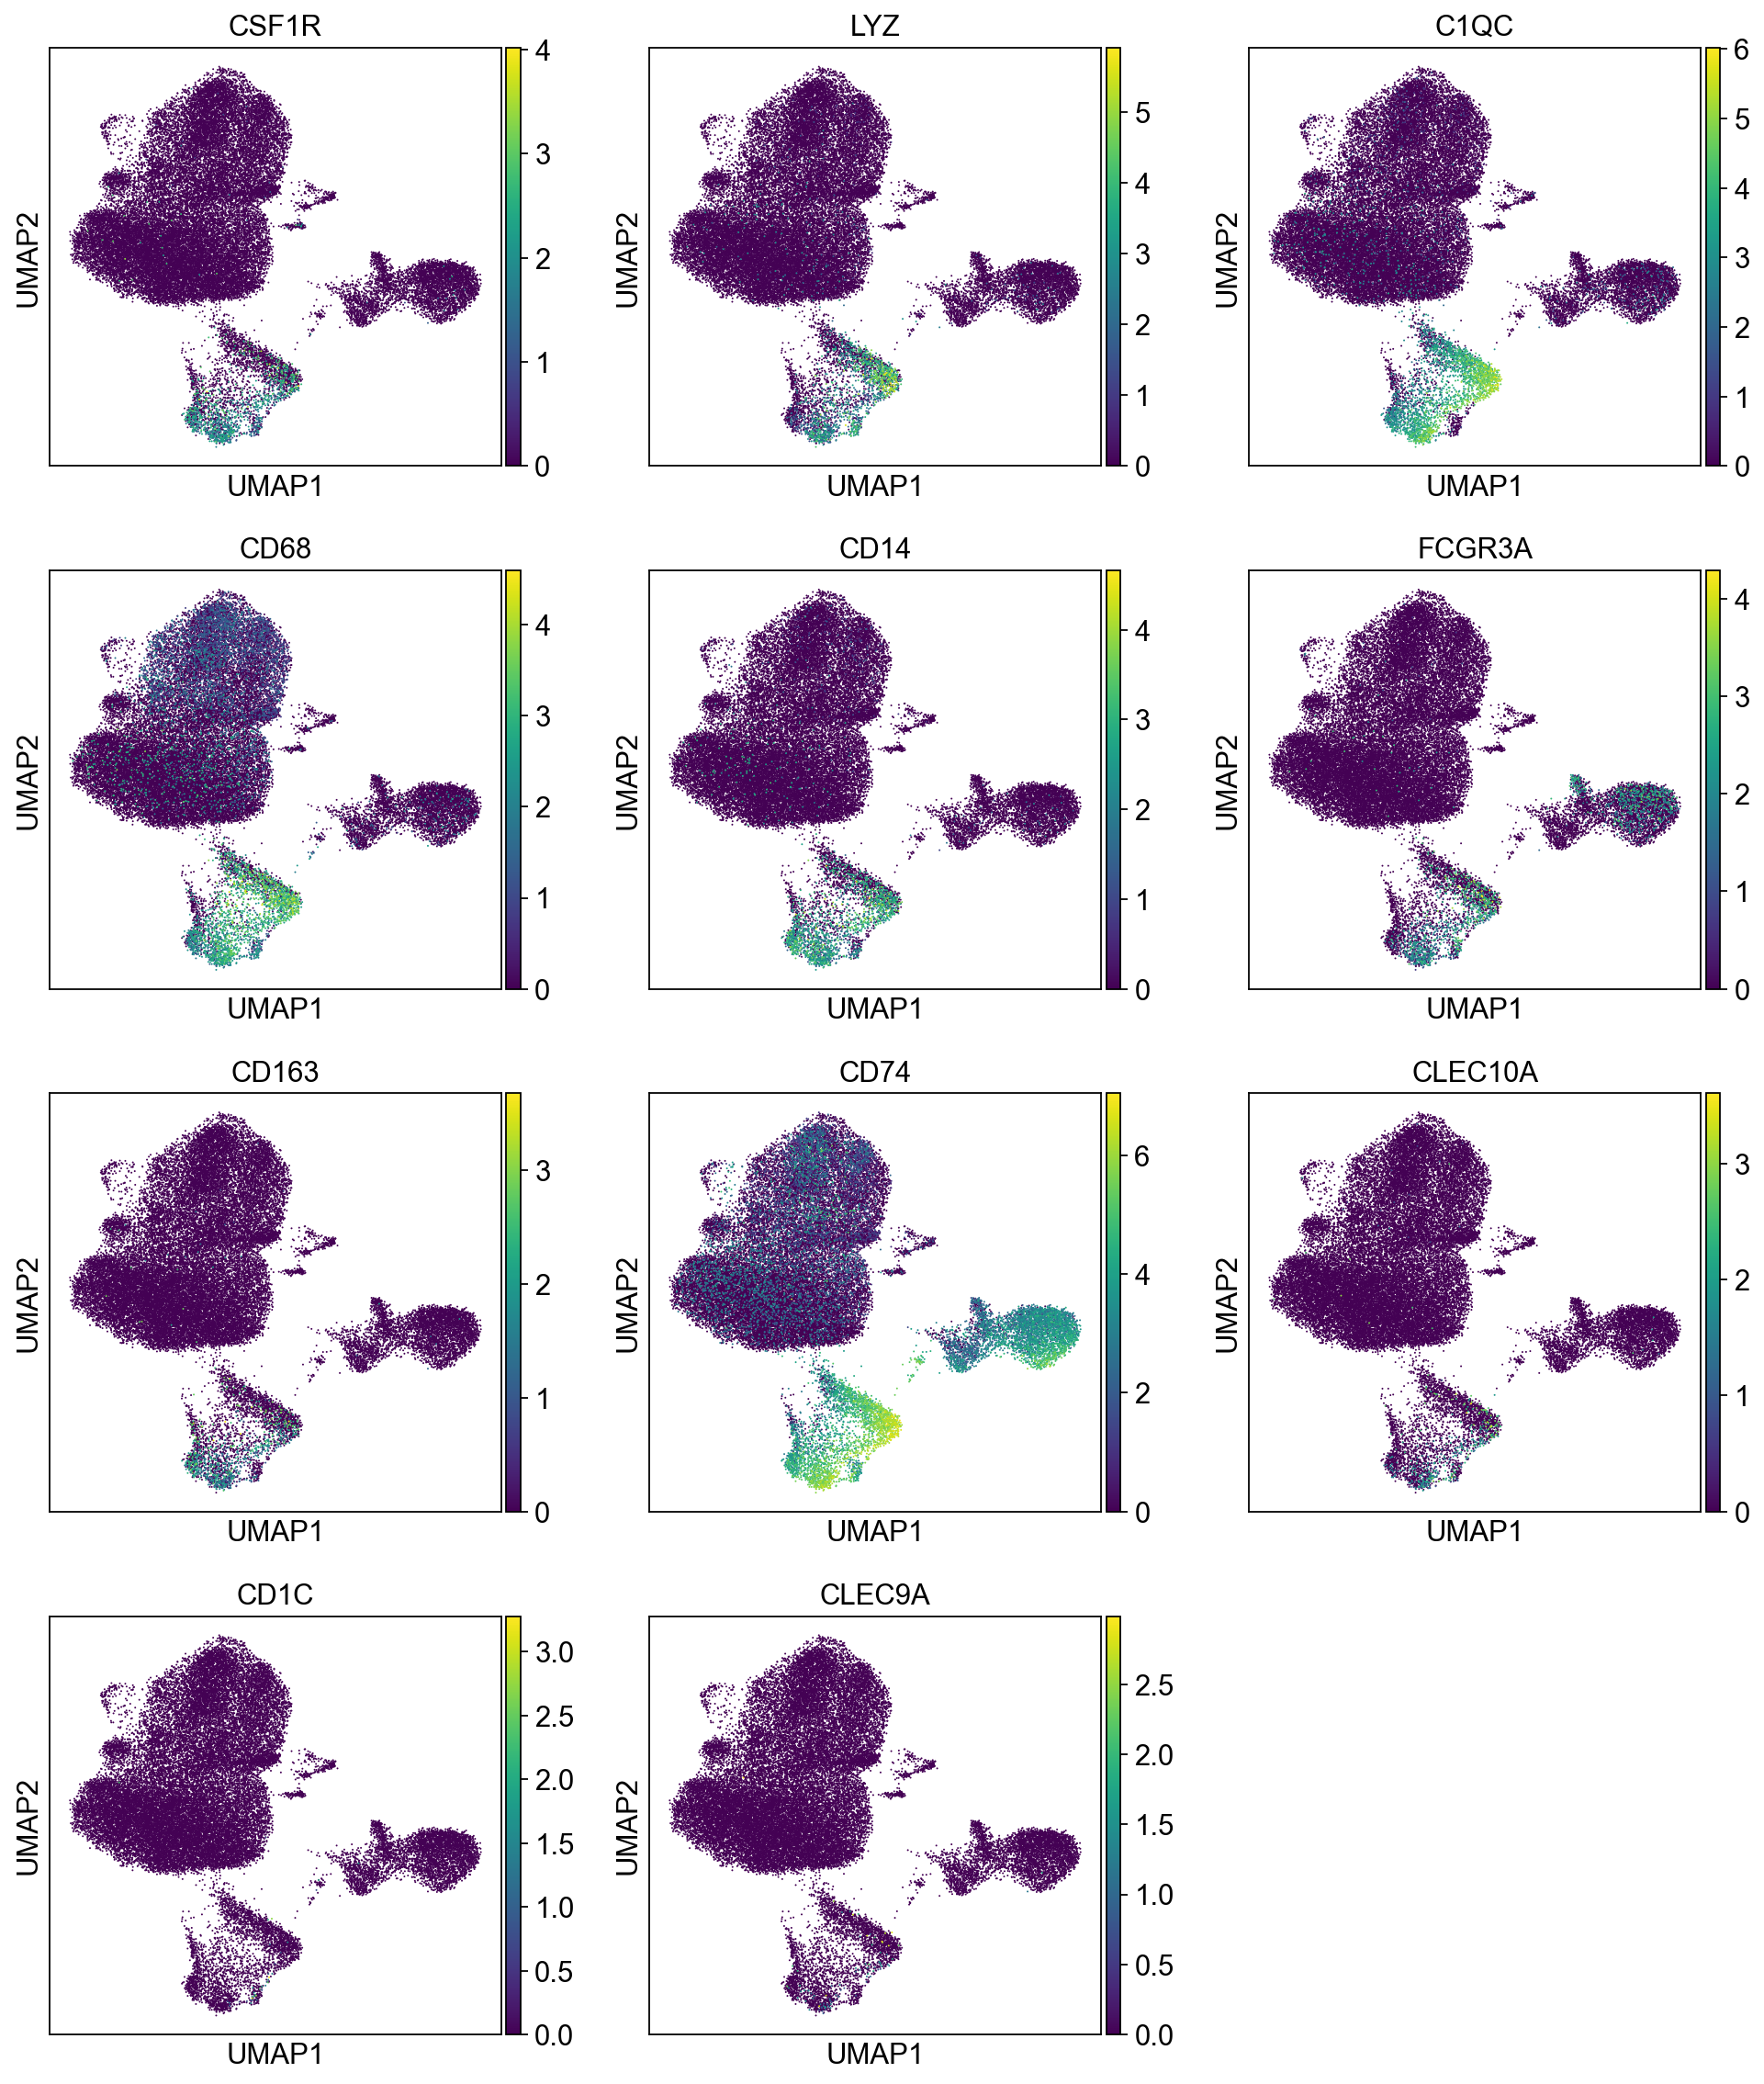

In [22]:
sc.pl.umap(adata, color=['CSF1R', 'LYZ', 'C1QC', 'CD68', 'CD14', 'FCGR3A', 'CD163', 'CD74', 'CLEC10A', 'CD1C', 'CLEC9A'], ncols=3, use_raw=False)

In [23]:
sc.tl.rank_genes_groups(adata, groupby='leiden')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)


In [41]:
pd.DataFrame(adata.uns["rank_genes_groups"]["names"][0:60])

0        1       2         3         4         5           6  \
0        FOS      MIF   RPS12    TMSB4X    TMSB4X      PMEL      MALAT1   
1     IGFBP7    GAPDH   RPS18       B2M      CD74     TYRP1       NEAT1   
2       MTDH     RPL8   RPL12     HLA-B    TYROBP      APOE        WSB1   
3     ARID5B    SERF2    RPS6      SRGN   HLA-DRA     MLANA       DDX17   
4       PAX3    RPL30   RPLP1     HLA-C       FTL    MT-ND3        XIST   
5      GRINA   S100A1    RPS8     HLA-A      C1QA     SNHG7      SRSF11   
6       EGR1    UQCRB   RPS23      CST7      CST3      MITF     N4BP2L2   
7        BSG    RPS18  EEF1A1      CCL5  HLA-DPA1     RPS28         FUS   
8     MALAT1    RPLP0   RPL13     HLA-E      C1QC    MT-ND1       LONP2   
9      GPM6B     PPIA   RPL32      IL32      C1QB    MT-CO3      LUC7L3   
10       JUN     RPL7   TYRP1     CXCR4     SEPP1     ASAH1       RBM39   
11    NDUFB9    COX6C   RPL34      CD3E  HLA-DPB1     HHATL     MT-ND4L   
12      CD44     FTH1   RPS24      NKG7      AIF1    MT-CO2       SREK1   
13      LMNA     LDHB   RPL7A      CD3D  HLA-DRB1    MT-CYB  GABPB1-AS1   
14    ZNF106    RPL36   RPS3A      RGS1    FCER1G      CD63    KCNQ1OT1   
15       APP    RPL19   RPS14     PTPRC      GPX1    MT-ND2      ZNF207   
16    MT-CO1    RPL28   RPS13   ARHGDIB      SAT1     EDNRB         SF1   
17   LAPTM4A     RPL3   RPL39      GZMK      CD68     GPNMB        ZEB2   
18  PPP1R15A   CITED1   RPL37      CD8A      CTSB     RPS26        CHD9   
19    SLC3A2   RPL37A    PMEL    MALAT1  HLA-DRB5   MT-ATP8        SMG1   
20      CTSF    UQCRH  RPL37A    CORO1A    MS4A6A  SERPINF1      MT-CO3   
21      WSB1    UQCRQ   RPL36      ACTB      SRGN     GSTP1       PNISR   
22  LGALS3BP    RPL41   RPS4X      GZMA    LAPTM5     RPL36       CPEB2   
23      IER2    HINT1   RPL29      BTG1    TMSB10    RPL35A      SPTBN1   
24    ATP1A1    ATP5E    TPT1      PFN1     FCGRT      SPP1        FMN1   
25      BRD2    RPS23   RPS28       CD2  HLA-DQA1      CTSL         A2M   
26    LRPAP1    RPLP1   RPS19      CD74    RNASE1    RPL37A        SOX6   
27     NR4A1    GSTP1    RPS3       CD7     MS4A7     RPL34        NKTR   
28      ATF3   EEF1A1    RPS7      CREM  HLA-DQB1     RPL37     RASGRP3   
29     MFGE8   S100A6   RPL35     DUSP4      NPC2   MT-ND4L      MT-CO2   
30   ST3GAL4    SDCBP   RPL21    LAPTM5      CD14   MT-ATP6       CCNL2   
31      JUNB    RPL37  RPL18A  SH3BGRL3   HLA-DMA    MT-ND4       RBM25   
32      LY6E    RPL39    RPL3   TNFAIP3       B2M    TFAP2A       RSRP1   
33     MYO10     RPS8  RPS27A     IL2RG      CCL3     RPS15      INPP4B   
34      GPX3     CSTB  RPL35A     H3F3B      PSAP    MT-CO1        MDM4   
35   RHOBTB3   RPL18A   RPS25       UBC      CTSS      RPS2      NPIPB5   
36      CD59   POLR2L   SNHG7      RAC2      IL1B     TEX41      PHLDB1   
37    MT-ND5     RPL9   RPL15      CD27     CXCL8      CD44     ANKRD10   
38    MT-CYB  CHCHD10   RPS15      LSP1      LGMN   CHCHD10     PLEKHA5   
39      MITF    ALDOA    RPS2     SARAF     STAB1     ABCB5      PRPF4B   
40    TSPAN3   NDUFA4  GNB2L1     PSMB9      SOD2   LAPTM4A      ZRANB2   
41  SERPINF1     QDPR   MLANA   TSC22D3      CD83     RPS12         SON   
42    TMED10     NME2   RPL18     ZFP36      SPI1     TOMM7       PDE4D   
43     RAB2A    ATP5I   RPL14      CD8B       LYZ    MT-ND5        VMP1   
44    SPTBN1   PABPC1   RPS26       EVL     PLAUR      RPS6      HECTD1   
45     SPARC    ATP5B  RPL10A      CTSW   SLC40A1     RPL39     SULT1C2   
46      RTN4    COX7C   ZFAS1     TRBC2     ITM2B     RPL32       LENG8   
47   PTTG1IP    CRYAB   RPL24   RARRES3      FTH1      RPS8         OGT   
48     HLA-A   LGALS1    RPL5     NR4A2      CCL4    CRTAC1     MT-ATP8   
49    MT-ND6     RBM3   RPS27    ZNF331      FGL2     BAMBI        PKD2   
50    PABPC1  SLC25A5   RPL10       LCK     CXCL2      MLPH     GOLGA8A   
51     ILVBL   GNB2L1    RPS9     LIMD2      DAB2      CD59     GOLGA8B   
52   LAPTM4B    EIF3E    RPL9      C

In [48]:
annot_list = ['Melanoma cells', 'Melanoma cells',
              'Melanoma cells',
              'T cells',
              'Myeloid cells',
              'Melanoma cells', 
              'Melanoma cells',
              'Rentinal neural cells',
              'Retinal pigment epithelium']
adata.obs['annot'] = pd.Categorical([annot_list[int(i)] for i in adata.obs.leiden],
                                    categories=['Melanoma cells', 
                                                'Retinal pigment epithelium', 
                                                'Rentinal neural cells',
                                                'T cells', 
                                                'Myeloid cells'])

/home/orimosko/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


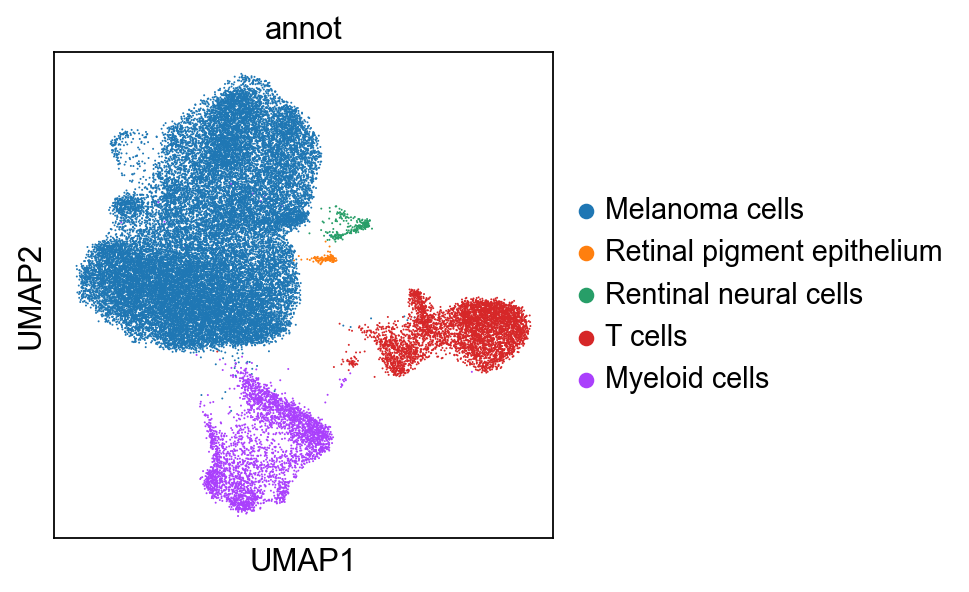

In [119]:
sc.pl.umap(adata, color='annot', save='_UM.pdf')

/home/orimosko/.local/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


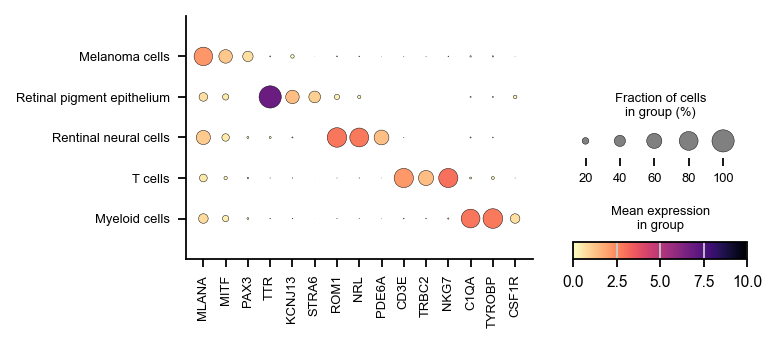

In [120]:
dot = sc.pl.dotplot(
    adata,
    ['MLANA', 'MITF', 'PAX3', 
     'TTR', 'KCNJ13', 'STRA6', 
     'ROM1', 'NRL', 'PDE6A',
     'CD3E', 'TRBC2', 'NKG7',
     'C1QA', 'TYROBP', 'CSF1R'], 
    groupby='annot',
    figsize=(4.5, 2),
    vmax=10,
    vmin=0,
    cmap="magma_r",
    return_fig=True 
)

fig = dot.get_axes()['mainplot_ax'].get_figure()

# Hide top and right spines for all axes
for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
# Shrink main dots
for artist in dot.get_axes()['mainplot_ax'].collections:
    artist.set_sizes(artist.get_sizes() * 0.5)

# Shrink legend dots
for artist in dot.get_axes()['size_legend_ax'].collections:
    artist.set_sizes(artist.get_sizes() * 0.5)
    
for label in ax.get_xticklabels():
    label.set_fontsize(7)
for label in ax.get_yticklabels():
    label.set_fontsize(7)

fig.savefig('UM_figures/dotplothuman_UM.pdf')

In [103]:
macdata = adata[adata.obs.leiden == "4"].copy()

In [104]:
macdata

AnnData object with n_obs × n_vars = 3448 × 33694
    obs: 'Sample', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'count_scale', 'doublet_score', 'predicted_doublet', 'leiden', 'annot'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'scrublet', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'Sample_colors', 'rank_genes_groups', 'dendrogram_leiden', 'annot_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [105]:
macdata.obs.Sample.value_counts()

Sample
UMM065    919
UMM066    825
UMM063    691
UMM064    342
UMM059    261
UMM061    221
UMM062    174
UMM069     15
Name: count, dtype: int64

In [106]:
sc.pp.highly_variable_genes(macdata)

In [107]:
sc.pp.pca(macdata, use_highly_variable=True)

In [108]:
sc.external.pp.bbknn(macdata, batch_key='Sample')

In [109]:
sc.tl.umap(macdata)

In [110]:
sc.tl.leiden(macdata, resolution=0.5)

/home/orimosko/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/orimosko/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


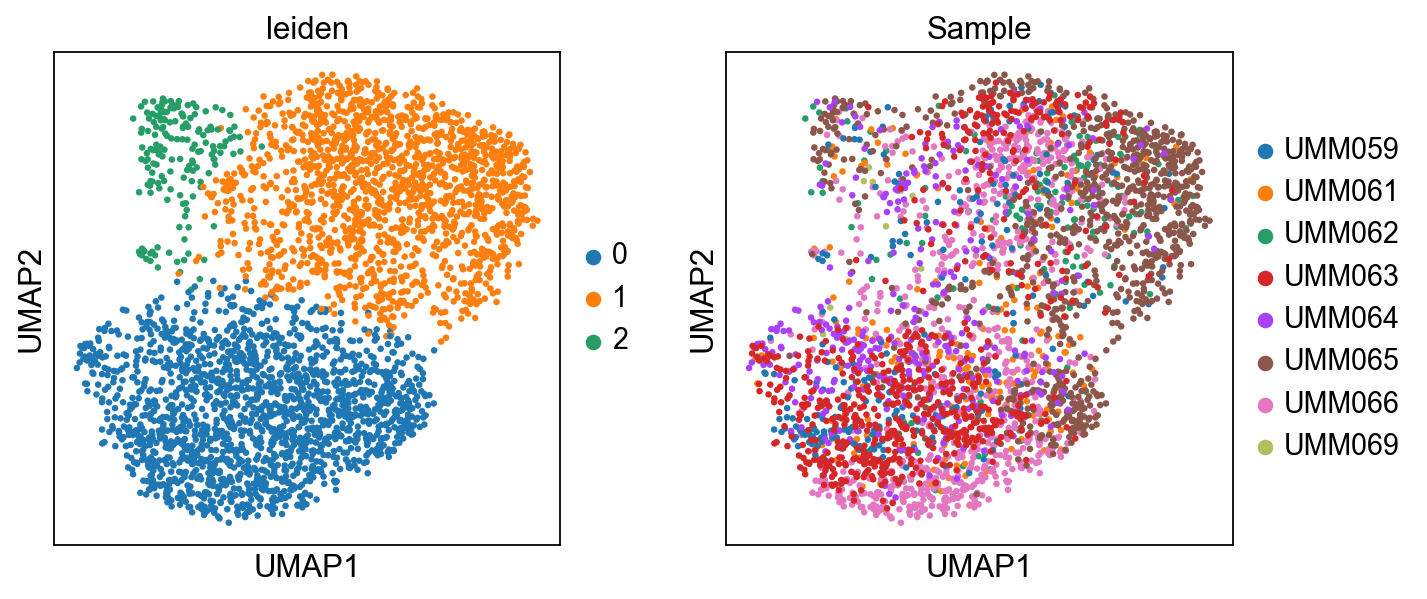

In [111]:
sc.pl.umap(macdata, color=['leiden', 'Sample'], ncols=2)

In [112]:
sc.tl.rank_genes_groups(macdata, groupby='leiden')

In [113]:
pd.DataFrame(macdata.uns["rank_genes_groups"]["names"][51:100])

0             1         2
0         OAZ1        CSRNP1     PNRC1
1      SLC25A5         CCNL1     RPL24
2     HLA-DRB5          PLAU      CYBA
3       ATP5G3          MAFF     RPS27
4       GIMAP4         NLRP3     ARPC3
5      ATP6V1F         NFKB1    RILPL2
6     DNASE1L3           ID2     RPS14
7      SH3BGRL        MT-ND1      OAZ1
8        SERF2          BTG1      AREG
9        ASNA1        MT-ND2     RPS24
10     SLC40A1          EGR2     RPL34
11        TUBB          WSB1      RPS2
12      UBE2L6        MT-ND4    MALAT1
13    SERPINF1      RASGEF1B     RPL29
14      LGALS3         HBEGF    ATP2B1
15        CTSK         SOCS3      IL1B
16       PRDX2          SRGN       FGR
17       PGAM1        NFKBID      RPL6
18       VAMP8         PDE4B     RPS26
19       SUMO2       ZFP36L1      RPL8
20    MTRNR2L8          LMNA      TSPO
21      AKR1A1          DDX5   S100A10
22      UQCR10        MT-ND3     RPL39
23    ADAMDEC1        ZNF331     ZFP36
24       PSME1         THAP2   LRRFIP1
25      SEPHS2        CDKN1A      CD83
26     PRELID1        MAP2K3     RPS21
27      FKBP1A         FOSL2    NAP1L1
28        MDH2          CCL2     LIMD2
29        CD63        CHMP1B       CFP
30       SPON2         ABCA1    PABPC1
31       PEBP1  RP11-160E2.6      CD48
32       COX6C       HERPUD1     ARPC2
33  AP000439.1         ARL4C    STXBP2
34      MRPL17          CREM    NFKBIA
35        CTSD          ETS2    RNF149
36      SOWAHD          KLF4      CCNI
37      S100A1         EIF4E    S100A9
38       FABP5        NFE2L2  SERPINB9
39        HTN1         C5AR1    MYL12B
40       SRP14          MIDN      CFL1
41       PRDX3          IL1A      CD44
42      IGFBP7         DDX3X     RPS16
43       CCL18         HIF1A  C1orf162
44      MYL12A          SELK      SELK
45       OSTF1         NABP1     PFDN5
46       ACOT2          RGS1       MSN
47       DNPH1          SFPQ     KDM6B
48      COMMD9         CEBPB    S100A8

In [114]:
annot_list = ['Macrophages', 'MonMacs', 'Monocytes']
macdata.obs['annot'] = pd.Categorical([annot_list[int(i)] for i in macdata.obs.leiden],
                                    categories=['Monocytes', 'MonMacs', 'Macrophages'])

/home/orimosko/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


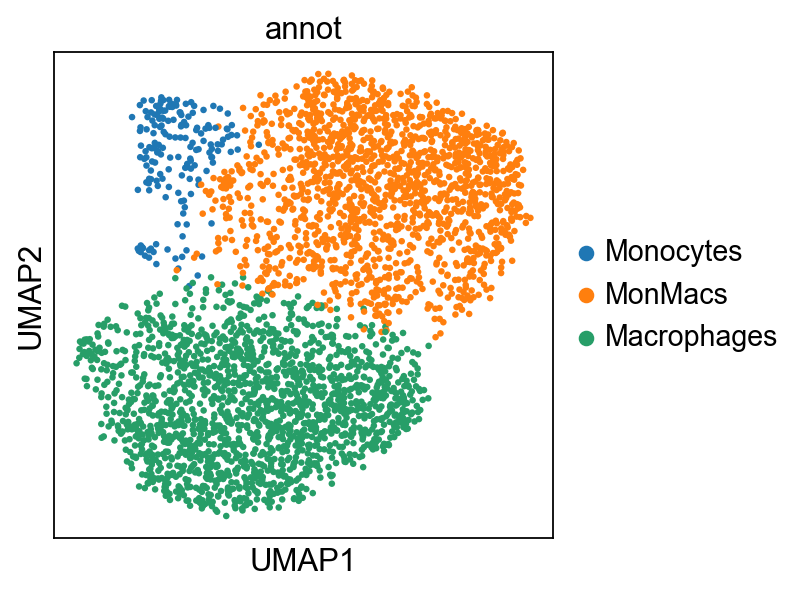

In [115]:
sc.pl.umap(macdata, color='annot', save='_UM_macrophages.pdf')

/home/orimosko/.local/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


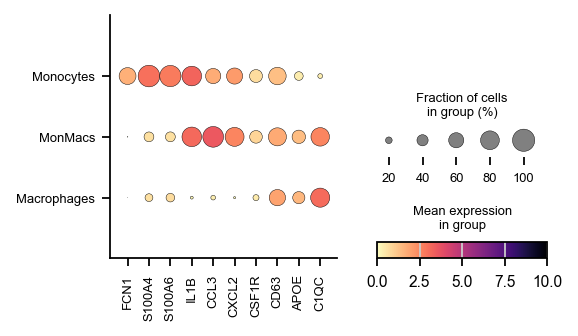

In [121]:
dot = sc.pl.dotplot(
    macdata,
    ['FCN1', 'S100A4', 'S100A6', 
     'IL1B', 'CCL3', 'CXCL2', 'CSF1R',
     'CD63', 'APOE', 'C1QC'],
    groupby='annot',
    figsize=(3.5, 2),
    vmax=10,
    vmin=0,
    cmap="magma_r",
    return_fig=True 
)

fig = dot.get_axes()['mainplot_ax'].get_figure()

# Hide top and right spines for all axes
for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
# Shrink main dots
for artist in dot.get_axes()['mainplot_ax'].collections:
    artist.set_sizes(artist.get_sizes() * 0.5)

# Shrink legend dots
for artist in dot.get_axes()['size_legend_ax'].collections:
    artist.set_sizes(artist.get_sizes() * 0.5)
    
for label in ax.get_xticklabels():
    label.set_fontsize(7)
for label in ax.get_yticklabels():
    label.set_fontsize(7)

fig.savefig('UM_figures/dotplothuman_UM_macrophages.pdf')

In [92]:
macdata = macdata[macdata.obs.leiden == "0"].copy()

In [93]:
macdata.shape

(1741, 33694)

In [267]:
new_up_and_corr_genes_human = [
    "FTH1", "WFDC17", "CCL9", "FABP5", "CSTB", "MARCO", "CTSK", "CD63", "LGALS3",
    "LYZ", "ESD", "FTL", "CD68", "RNH1", "GPNMB", "MT1A", "CAPG", "TUBA1C",
    "CRIP1", "ACP5", "LGALS1", "SOD2", "CALM1", "CALR", "TMSB10", "GAPDH", "NME1",
    "SLC39A2", "MRPL52", "EMP3", "CLEC4D", "ANXA4", "CTSB", "TYMS", "CTSZ", "ANPEP",
    "TCEAL9", "MSR1", "MANF", "CCL17", "CYBA", "ATP5ME", "GLRX", "CD24", "ATP6V1C1",
    "TSPO", "CALM3", "PRDX1", "ATP5MJ", "CTSC", "ANXA5", "MT2A", "BCAP31", "HINT1",
    "VAT1", "ENO1", "PYCARD", "ALDOA", "CAV1", "GLA", "FABP4", "NQO2", "ATP6V0B",
    "MFGE8", "TIMM13"
]

In [268]:
sc.tl.score_genes(macdata, gene_list=new_up_and_corr_genes_human, score_name="effero_score", use_raw=False)

computing score 'effero_score'
    finished: added
    'effero_score', score of gene set (adata.obs).
    448 total control genes are used. (0:00:00)


In [293]:
corr_macdata = macdata.copy()


In [294]:
sc.pp.filter_genes(corr_macdata, min_cells=10)

filtered out 24164 genes that are detected in less than 10 cells


In [ ]:
gene_df = pd.DataFrame(index=corr_macdata.var_names, columns=['pearson_r', 'pearson_p'])

In [ ]:
for gene in corr_macdata.var_names:
    x = corr_macdata.obs['effero_score'].values
    y = corr_macdata[:, gene].X.todense().A1
    pearson_r, pearson_p = pearsonr(x, y)
    gene_df.loc[gene] = [pearson_r, pearson_p]

In [ ]:
functional_genes = ['ANXA1', 'ANXA2', 'ATP6V1F', 'CTSD', 'CTSH', 'CTSL', 'RHOA', 
                    'LIPA', 'APOC1', 'APOE',
                    'MMP12',
                    'PKM', 'PGK1', 'TPI1',
                    'CCL18', 'CXCL16', 
                    'SPI1', 'IL1RN', 'SPP1', 'TREM2', 'ADAMDEC1', 'CD300A']

In [357]:
hm_df = macdata[:,functional_genes].to_df().iloc[np.argsort(macdata.obs.effero_score)]

In [358]:
scaled_hm_df = zscore(hm_df)

In [360]:
quantile_means = pd.DataFrame([chunk.mean() for chunk in np.array_split(scaled_hm_df, 100)]).T

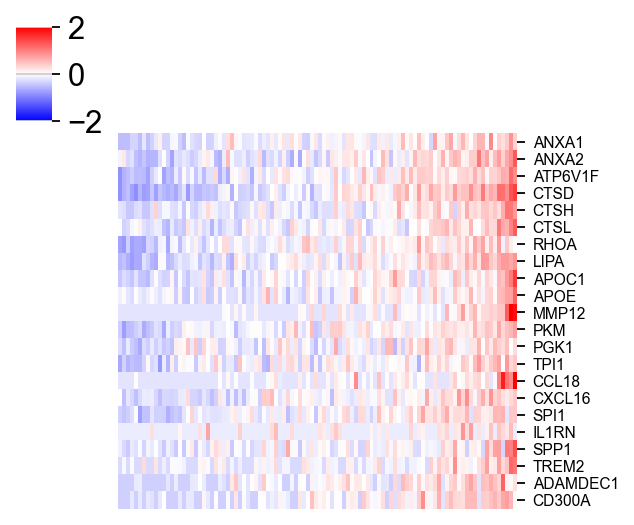

In [394]:
g = sns.clustermap(quantile_means, cmap='bwr', vmin=-2, vmax=2, center=0, col_cluster=False, row_cluster=False,
               xticklabels=False, yticklabels=True, figsize=(4.5,3.25))
g.ax_heatmap.grid(False)
g.ax_heatmap.set_ylabel('')
g.ax_heatmap.tick_params(axis='y', labelsize=7) 
plt.savefig("figures/uveal_melanoma_scaled_manual.pdf")


In [354]:
gene_df[~gene_df.index.isin(new_up_and_corr_genes_human)].to_csv("uveal_melanoma_effero_genes.csv")

 # Shared dotplot

In [621]:
ipf_genedata = pd.read_csv("correlations_IPF_both.csv", index_col=0)

In [622]:
nsclc_genedata = pd.read_csv("intmacs_nsclc_both.csv", index_col=0)

In [623]:
als_genedata = pd.read_csv("correlations_ALS_both.csv", index_col=0)

In [568]:
uveal_genedata = pd.read_csv("uveal_melanoma_effero_genes.csv", index_col=0)

In [626]:
uveal_genedata = uveal_genedata.dropna(subset=['pearson_p'])
als_genedata = als_genedata.dropna(subset=['pearson_p_normal', 'pearson_p_ALS'])
nsclc_genedata = nsclc_genedata.dropna(subset=['pearson_p_normal', 'pearson_p_ipf'])
ipf_genedata = ipf_genedata.dropna(subset=['pearson_p_normal', 'pearson_p_ipf'])
uveal_genedata.pearson_p = fdrcorrection(uveal_genedata.pearson_p.values)[1]
als_genedata.pearson_p_normal = fdrcorrection(als_genedata.pearson_p_normal.values)[1]
als_genedata.pearson_p_ALS = fdrcorrection(als_genedata.pearson_p_ALS.values)[1]
nsclc_genedata.pearson_p_normal = fdrcorrection(nsclc_genedata.pearson_p_normal.values)[1]
nsclc_genedata.pearson_p_ipf = fdrcorrection(nsclc_genedata.pearson_p_ipf.values)[1]
ipf_genedata.pearson_p_normal = fdrcorrection(ipf_genedata.pearson_p_normal.values)[1]
ipf_genedata.pearson_p_ipf = fdrcorrection(ipf_genedata.pearson_p_ipf.values)[1]

/tmp/ipykernel_286581/3086216069.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  als_genedata.pearson_p_normal = fdrcorrection(als_genedata.pearson_p_normal.values)[1]
/tmp/ipykernel_286581/3086216069.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  als_genedata.pearson_p_ALS = fdrcorrection(als_genedata.pearson_p_ALS.values)[1]


In [628]:
# Get the union of all gene indices
all_genes = (
    set(als_genedata.index)
    | set(ipf_genedata.index)
    | set(nsclc_genedata.index)
    | set(uveal_genedata.index)
)

In [629]:
unified_pearson_df = pd.DataFrame(
    index=sorted(all_genes),
    data={
        "ALS_normal_R": als_genedata.reindex(all_genes)["pearson_r_normal"] if "pearson_r_normal" in als_genedata else als_genedata.reindex(all_genes)["pearson_r"],
        "ALS_normal_p": als_genedata.reindex(all_genes)["pearson_p_normal"] if "pearson_p_normal" in als_genedata else als_genedata.reindex(all_genes)["pearson_p"],
        "ALS_disease_R": als_genedata.reindex(all_genes)["pearson_r_ALS"] if "pearson_r_ALS" in als_genedata else als_genedata.reindex(all_genes)["pearson_r"],
        "ALS_disease_p": als_genedata.reindex(all_genes)["pearson_p_ALS"] if "pearson_p_ALS" in als_genedata else als_genedata.reindex(all_genes)["pearson_p"],
        "IPF_normal_R": ipf_genedata.reindex(all_genes)["pearson_r_normal"] if "pearson_r_normal" in ipf_genedata else ipf_genedata.reindex(all_genes)["pearson_r"],
        "IPF_normal_p": ipf_genedata.reindex(all_genes)["pearson_p_normal"] if "pearson_p_normal" in ipf_genedata else ipf_genedata.reindex(all_genes)["pearson_p"],
        "IPF_disease_R": ipf_genedata.reindex(all_genes)["pearson_r_ipf"] if "pearson_r_ipf" in ipf_genedata else ipf_genedata.reindex(all_genes)["pearson_r"],
        "IPF_disease_p": ipf_genedata.reindex(all_genes)["pearson_p_ipf"] if "pearson_p_ipf" in ipf_genedata else ipf_genedata.reindex(all_genes)["pearson_p"],
        "NSCLC_normal_R": nsclc_genedata.reindex(all_genes)["pearson_r_normal"] if "pearson_r_normal" in nsclc_genedata else nsclc_genedata.reindex(all_genes)["pearson_r"],
        "NSCLC_normal_p": nsclc_genedata.reindex(all_genes)["pearson_p_normal"] if "pearson_p_normal" in nsclc_genedata else nsclc_genedata.reindex(all_genes)["pearson_p"],
        "NSCLC_disease_R": nsclc_genedata.reindex(all_genes)["pearson_r_ipf"] if "pearson_r_ipf" in nsclc_genedata else nsclc_genedata.reindex(all_genes)["pearson_r"],
        "NSCLC_disease_p": nsclc_genedata.reindex(all_genes)["pearson_p_ipf"] if "pearson_p_ipf" in nsclc_genedata else nsclc_genedata.reindex(all_genes)["pearson_p"],
        "UM_R": uveal_genedata.reindex(all_genes)["pearson_r"],
        "UM_p": uveal_genedata.reindex(all_genes)["pearson_p"],
    }
)


In [631]:
long_df = (
    unified_pearson_df
    .reset_index()
    .melt(id_vars='index', var_name='variable', value_name='value')
)

# Split variable into model, condition, and stat (R or p)
long_df[['model', 'condition', 'stat']] = long_df['variable'].str.extract(r'^(ALS|IPF|NSCLC|UM)_?(normal|disease)?_?(R|p)?$')


In [632]:
# Fix UM rows (UM_R, UM_p have no condition)
long_df.loc[long_df['model'] == 'UM', 'condition'] = 'disease'

# Pivot so each row is a gene/model/condition, with columns R and p
long_df = long_df.pivot_table(
    index=['index', 'model', 'condition'],
    columns='stat',
    values='value'
).reset_index()

# Calculate -log10(P)
long_df['minus_log10_p'] = -np.log10(long_df['p'])

# Rename columns for clarity
long_df = long_df.rename(columns={'index': 'gene', 'R': 'R', 'p': 'P', 'model': 'model', 'condition': 'condition'})

long_df


/home/orimosko/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


stat            gene  model condition         R             P  minus_log10_p
0               A1BG    ALS   disease  0.067707  2.595045e-15      14.585855
1               A1BG    ALS    normal  0.066729  5.606510e-05       4.251307
2               A1BG    IPF   disease -0.031861  3.598145e-02       1.443921
3               A1BG    IPF    normal  0.003831  8.945557e-01       0.048393
4               A1BG  NSCLC   disease  0.050015  1.077465e-01       0.967597
...              ...    ...       ...       ...           ...            ...
108844          ZZZ3     UM   disease  0.035336  7.186361e-01       0.143491
108845  bP-21264C1.2    IPF   disease  0.007951  6.897742e-01       0.161293
108846  bP-21264C1.2    IPF    normal  0.030696  1.275008e-01       0.894487
108847  bP-21264C1.2  NSCLC   disease  0.005675  9.067120e-01       0.042531
108848  bP-21264C1.2  NSCLC    normal  0.032442  3.288519e-01       0.483000

[108849 rows x 6 columns]

In [644]:
long_df.loc[long_df.minus_log10_p.values > 9, 'minus_log10_p'] = 9

In [645]:
long_df[['model', 'condition']].value_counts()

model  condition
ALS    disease      20330
       normal       20330
IPF    disease      15971
       normal       15971
NSCLC  disease      13385
       normal       13385
UM     disease       9477
Name: count, dtype: int64

In [ ]:
selected_genes = ['TUBA1B',
 'LIPA',
 'CTSH',
 'TREM2',
 'APOE',
 'APOC1',
 'C1QC',
 'C1QB',
 'HLA-DRA',
 'HLA-DRB1',
 'CD74',
 'VEGFA',
 'VEGFB',
 'PDE8A',
 'HBEGF',
 'GRAMD1B',
 'DPP4',
 'ABCG1',
 'ERO1A',
 'CD58', 'ADTRP', 'CAT', 'CIR1', 'SLC27A3', #IPF
 'RXRA', 'BMP2K', 'CLEC4A', #NSCLC'
 'MMP12' # UM
]

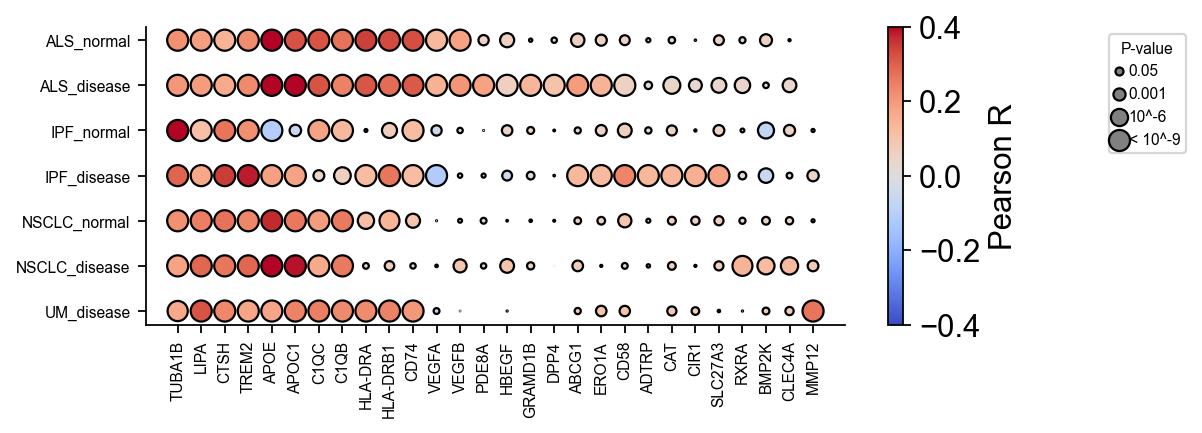

In [712]:
size_times = 10


plot_df = long_df[long_df['gene'].isin(selected_genes)].copy()

# Set categorical order for genes and models for consistent plotting
plot_df['gene'] = pd.Categorical(plot_df['gene'], categories=selected_genes, ordered=True)
model_order = ['ALS', 'IPF', 'NSCLC', 'UM']
condition_order = ['normal', 'disease']
plot_df['model'] = pd.Categorical(plot_df['model'], categories=model_order, ordered=True)
plot_df['condition'] = pd.Categorical(plot_df['condition'], categories=condition_order, ordered=True)

# Assign y positions for each (model, condition)
plot_df['y'] = plot_df['model'].astype(str) + "_" + plot_df['condition'].astype(str)
y_order = ['ALS_normal', 'ALS_disease',
           'IPF_normal', 'IPF_disease',
           'NSCLC_normal', 'NSCLC_disease', 'UM_disease']
plot_df['y'] = pd.Categorical(plot_df['y'], categories=y_order, ordered=True)

plt.figure(figsize=(len(selected_genes)*0.25, len(y_order)*0.35))
# Use categorical codes for x and y axes
x = plot_df['gene'].cat.codes
y = plot_df['y'].cat.codes

# Reverse the order of y_order and update plot_df['y'] accordingly
y_order = y_order[::-1]
plot_df['y'] = pd.Categorical(plot_df['y'], categories=y_order, ordered=True)
y = plot_df['y'].cat.codes

sc = plt.scatter(
    x=x,
    y=y,
    s=plot_df['minus_log10_p']*size_times,
    c=plot_df['R'],
    cmap='coolwarm',
    vmin=-0.4,
    vmax=0.4,
    edgecolor='k'
)

# Remove top and right axis spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(ticks=range(len(selected_genes)), labels=selected_genes, rotation=90, fontsize=7)
plt.yticks(ticks=range(len(y_order)), labels=y_order, fontsize=7)
plt.xlabel('')
plt.ylabel('')
plt.colorbar(sc, label='Pearson R')
#plt.tight_layout()
plt.grid(False)

# Add dot size legend
size_legend_p = [0.05, 1e-3, 1e-6, 1e-9]  # Example p-values for legend
size_legend = -np.log10(size_legend_p)
size_legend_labels = ["0.05", "0.001", "10^-6", "< 10^-9"]  # Corresponding labels for legend
size_legend_sizes = size_legend * size_times  
for size, label in zip(size_legend_sizes, size_legend_labels):
    plt.scatter([], [], s=size, c='gray', edgecolor='k', label=label)
plt.legend(title='P-value', loc='upper right', bbox_to_anchor=(1.5, 1), fontsize=7, title_fontsize=7)
plt.savefig("figures/per_disease_effero_correlations.pdf")
plt.show()


In [713]:
unified_pearson_df.to_excel("correlations_all_models.xlsx")